# **Ensemble Learning**

**Ensemble Learning:** Aynı anda birçok machine learning algoritmasını kullanarak ortalamalarını alır ve bir model oluşturur.

Ensemble Learning algoritmaları birden çok algoritmayı birleştirdiği için çok güçlü algoritmalardır.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

**Creating Datasets**

In [ ]:
n_samples = 2000
n_features = 100
n_classes = 2

noise_moon = 0.3
noise_circle = 0.3
noise_class = 0.3

3 dataset oluşturulacaktır. İlki make classification datasetidir.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = n_samples,
                    n_features = n_features,
                    n_classes = n_classes,
                    n_repeated = 0,
                    n_redundant = 0,
                    n_informative = n_features-1,
                    random_state = 42,
                    n_clusters_per_class = 1,
                    flip_y = noise_class)

**n_sample** -> oluşturulacak sample sayısı belirlenir.

**n_features** -> sample sayısına karşılık olarak kaç feature oluşturulacağını belirler.

**n_classes** -> binary ya da multi-class'a sahip target variable'ı oluşturulur.

**n_repeated** -> tekrar eden feature sayısını belirtir.

**n_redundant** -> anlamsız sample sayısını belirtir.

**n_informative** -> test datasını sınıflandırırken yararlı olacak feature sayısıdır.

**flip_y** -> sınıfı rastgele atanan sampleların oranıdır. Büyük değerler noise'a sebep olur ve test verisinin sınıflandırılmasını zorlaştırır.

**n_clusters_per_class** -> sınıf başına düşen küme sayısını belirler.

In [ ]:
data = pd.DataFrame(X)
data["target"] = y

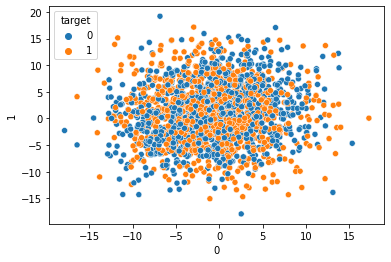

In [ ]:
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )
plt.show()

Data oluşturulurken bir noise değeri belirlendiğinden iki class birbirinden net bir şekilde ayrılmamaktadır.

In [ ]:
data_classification = (X,y)

Oluşturulan data tuple olarak bir variable içerisinde depolanır.

In [ ]:
from sklearn.datasets import make_moons
moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = 42)

Sample sayısı make_classification datasıyla aynıdır.

Kolay bir şekilde sınıflandırılmaması için bir noise yaratılır.

Oluşturulan moon tuple'ında 0. indeksinde x, 1. indeksinde y bulunur.

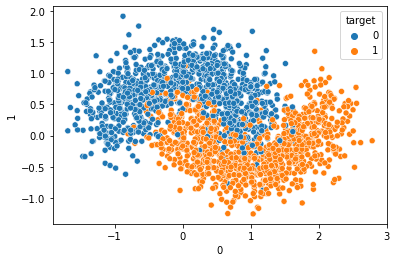

In [ ]:
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )
plt.show()

Noise eklendiğinden iki classın birbirine karıştığı görülür.

In [ ]:
from sklearn.datasets import make_circles
circle = make_circles(n_samples = n_samples, factor = 0.1,  noise = noise_circle, random_state = 42)

Sample sayısı make_moon ve make_classification ile aynıdır.

factor parametresi ile iki class arasındaki distance belirlenir.

factor parametresine 1'e yakın değerler verildikçe distance azalır, aynı anda noise da artırıldığında iç içe geçmiş iki circle oluşur, classification zorlaşır.

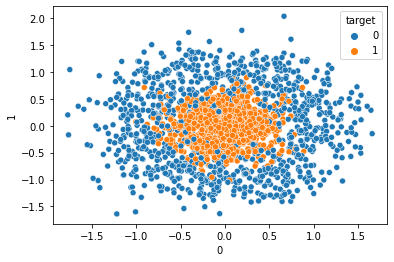

In [ ]:
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )
plt.show()

3 veriseti hazırlanmıştır.

make_moon ve make_circle dataları binary classification için kullanılacaktır.

make_classification datasıyla multi-class classification yapılarak algoritmaların class sayısı arttığı zaman başarı oranlarını değerlendirmek için kullanılacaktır.

In [ ]:
datasets = [moon, circle]

make_moon ve make_circle datalarıyla binary classification yapılacağından ve iki boyutlu olduklarından görselleştirilmek için birleştirilir.

make_classification datası için feature sayısı artırılacağından train ve test verisetinin accuracy'sine bakılacaktır, görselleştirme yapılmayacaktır.

**Basic Classifiers: KNN, SVM, Decision Tree, Random Forest, Adaptive Boosting, Voting**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42, max_depth = 2)

In [ ]:
from sklearn.svm import SVC
svc = SVC()

KNN, SVM, Decision Tree classifierların tüm verisetleri için en optimize parametreleri kullanılmıştır.

**Random Forest Classifier:** Birden fazla decision treelerden oluşan ensemble learning algoritmasıdır.

Decision tree'ler birleşerek random forest modelini oluşturur.

Random Forest algoritmasında, data train ve test olarak ayrılır.

**Bootstrap:** Train datasından n tane sample  random bir şekilde seçilerek **sub_data** oluşturulmasıdır.

Oluşturulan sub_data decision tree ile train edilerek **decision tree modeli** oluşturulur.

sub_data sayısı kadar decision tree classifier kullanılarak random forest modeli oluşturulur.

Model oluşturulduktan sonra test datası tüm decision tree'lere uygulanır.

Decision tree'lerdeki prediction sonuçlarına bakılarak çoğunluğa göre random forest modelinin sonucu belirlenir. Bu yöntemin adı **aggregate**'dir.

**B**ootstrap ve **Agg**regate ifadeleri kısaltılarak **Bagging** denir. 

Random Forest bir bagging (topluluk) algoritması olduğu için tüm bagging algoritmalarında olduğu gibi computation cost çok yüksektir.

Random Forest içerisinde bulunan n tane decision tree sayesinde önemli featureları bulma açısından güvenilir bir kaynaktır.

**Adaptive Boosting Classifier**

Boosting algoritması oluşturulurken şu adımlar izlenir.

*   weightler initialize edilmelidir. Bunun için 1/n formülü kullanılır. n sample sayısıdır.
*   Yanlış olan weightler toplanarak error rate elde edilir. (∑ = weight(wrong))
*   En küçük error rate seçilir.
*   Voting power(α) hesaplanır.
*   α = (1/2) * log ((1-error_rate) / error_rate)
*   Voting power hesaplandıktan sonra weightlerin güncellenip modelin oluşturulması gerekmektedir.
*   Eğer samplelar 
    * doğruysa -> w(new) = w(old) / (2*(1-error_rate))
    * yanlışsa -> w(new) = w(old) / (2*error_rate)
*   h(x) = ∑ αf(x(i)) (i=1;i<=n)
  
**stump:** bir node iki leaften oluşan bir decision tree'dir.

Adaptive Boosting algoritması stumplardan oluşan bir algoritmadır.

Belirlenen stump değerlerine göre (x>2,y<4 gibi) errorler ortaya çıkar.

Bu errorlerden en küçük olanı seçilir ve error rate hesaplanır.

Hesaplanan error_rate'e göre α değeri hesaplanır.

Doğru sample'lar ve yanlış sample'lar için weight değerleri hesaplanır ve güncellenir.

Doğru sample'ların weight'leri azalırken yanlış sample'ların artar.

Daha sonrasında stumplar bir önceki stump'ın açığını kapatmaya çalışır.

Random Forest algoritmasında training datasına paralel birden çok decision tree oluşturulurken, adaptive boosting'de stump'lar bir önceki stump'ın yanlışlarına odaklanarak bir algoritma oluşturur.

weight değerleri hesaplandıktan sonra h(x) değeri güncellenir.

Bir sonraki stump seçilirken bir önceki stump'a göre en küçük error rate sahip olan stump seçilir.

Random Forest algoritması varyansı azaltmak (overfitting durumunda) için kullanılırken, boosting algoritması bias'ı azaltmak (underfitting durumunda) için kullanılır.

**Voting Classifier**

Farklı algoritmaların başarı oranlarının birbirine yakın olduğu durumlarda seçilir.

Hard voting ve soft voting olmak üzere ikiye ayrılır;

Hard voting'de çoğunluğa göre bir label atanır.

Soft voting'de ise her classın her modelde gerçekleşme olasılığı ayrı ayrı hesaplanarak toplanır ve hangi class'ın yüzdesi daha yüksekse o class label olarak atanır.

Machine learning modelleri olasılıksal output ortaya çıkarttığında, soft voting tercih edilir.

In [ ]:
n_estimators = 10

Random forest algoritmasında bulunan decision tree sayısıdır.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = n_estimators, random_state = 42, max_depth = 2)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = n_estimators, random_state = 42)

In [ ]:
from sklearn.ensemble import VotingClassifier
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

In [ ]:
names = ["SVC", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "V1"]
classifiers = [svc, knn, dt, rf, ada, v1]

names listesinde yaratılan tüm algoritmaların isimleri bulunur.

classifierlar for döngüsü döndürüleceğinden listenin içerisinden tek tek seçilir.

Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.8875 
Decision Tree: train set score: 0.9 

Random Forest: test set score: 0.8875 
Random Forest: train set score: 0.895 

AdaBoost: test set score: 0.8825 
AdaBoost: train set score: 0.9283333333333333 

V1: test set score: 0.91 
V1: train set score: 0.92 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.73125 
Decision Tree: train set score: 0.7675 

Random Forest: test set score: 0.87875 
Random Forest: train set score: 0.91 

AdaBoost: test set score: 0.88125 
AdaBoost: train set score: 0.9133333333333333 

V1: test set score: 0.895 
V1: train set score: 0.9125 

-------------------------------------


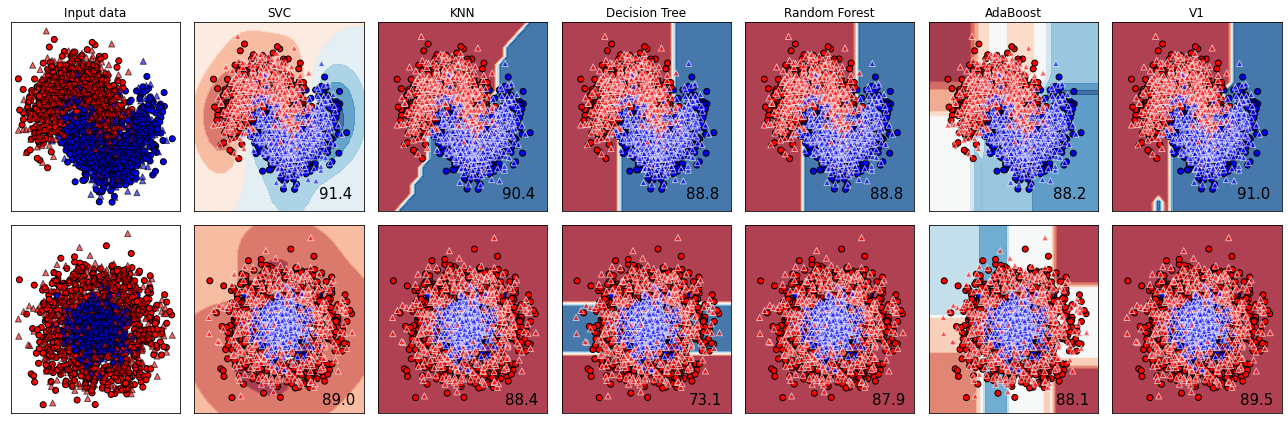

In [ ]:
from sklearn.preprocessing import RobustScaler #outlierlardan etkilenmeden scale işlemi gerçekleştirilir.
from sklearn.model_selection import train_test_split

h = 0.2
i = 1
figure = plt.figure(figsize=(18, 6))

for ds_cnt, ds in enumerate(datasets):
    #ds_cnt -> indeks
    #ds -> dataset
    
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    #scale edilmiş x ve y değerlerine göre meshgrid yapılır.
    #x_min ve x_max h çözünürlüğünde meshlere bölünür.

    cm = plt.cm.RdBu #plot üzerindeki arka plan için belirlenen renk
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) #samplelar için belirlenen renkler
                                                       #iki class olduğu için 2 renk belirlenmiştir.

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    #2 dataset 6 classifier -> 2x6'lık bir figürün içerisinde subplotlar yerleştirilir.
    #0. indekse orijinal dataset koyulacağı için 1 kaydırılır.
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    #training ve testing işlemi gerçekleştirilen veriler karıştırılmamak için marker ve saydamlık eklenir.
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))

    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        #algoritma eğitilir.
        
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        #test verisinin başarısına bakılır.
        
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        #train verisinin başarısına bakılır.
        
        print()
        
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #veri flatten yapılarak birleştirilir.
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100 #test score
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

İlk dataset moon, ikinci dataset circle datasettir.

Arkaplan meshgridlere ayrılmış datayla yapılmış sınıflandırmanın sonucudur.

Noktalar training sonuçlarıdır.

Beyaz renk çevrili üçgenler testing sonuçlarıdır.

200 sample, 10 feature, 2 class, 0.3 noise ile random forest ve decision tree modelleri karşılaştırıldığında,

make_moon datasıyla iki algoritma da test verisetiyle %83.75 başarı elde etmiştir.

make_circle datasıyla test verisetiyle decision tree %66.2 başarı elde etmişken, random forest modeli %75'lik başarı elde etmiştir.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

def make_classify(dc, clf, name):
    #dc -> make_classification datası
    
    x, y = dc
    #x -> feature
    #y -> target variable
    
    x = RobustScaler().fit_transform(x) #scaling
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=42)
    
    for name, clf in zip(names, classifiers):
        
        clf.fit(X_train, y_train)
        #model oluşturulur.
        
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        #test verisinin başarısına bakılır.
        
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        #train verisinin başarısına bakılır.
        
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

Dataset # 2
SVC: test set score: 0.8325 
SVC: train set score: 0.905 

KNN: test set score: 0.83 
KNN: train set score: 0.8475 

Decision Tree: test set score: 0.5825 
Decision Tree: train set score: 0.6208333333333333 

Random Forest: test set score: 0.62625 
Random Forest: train set score: 0.7216666666666667 

AdaBoost: test set score: 0.66375 
AdaBoost: train set score: 0.805 

V1: test set score: 0.8 
V1: train set score: 0.8666666666666667 



Score değerlerinin çok yüksek çıkmamasının nedeni make_classifier datasında net bir ayrımın olmaması, noise'un yüksek olmasıdır.

10000 sample, 50 feature, 0.1 noise ile SVM algoritmasında test veriseti için %95, train veri seti için %94'lük bir başarı elde edilmiştir.

Verisetindeki feature sayısı arttıkça SVM'deki başarı artacaktır.

Noise artırıldığında, SVM algoritmasının başarısının düşmesi beklenir.

noise 0.3 olduğunda train ve test verisetlerinde %85'lik bir başarı elde edilmiştir.

SVM memory efficient bir algoritmadır.

KNN'de training işlemi yapılmadığından, training için time efficient bir algoritmadır.

KNN outlierlardan etkilenen bir algoritmadır.

Feature sayısı artırıldığında SVM, KNN'e göre daha güçlü bir model oluşturacaktır.

Class sayısı artırıldığında KNN, SVM'e göre daha iyi sonuçlar üretecektir.

Çünkü genelde SVM binary classification problemlerinde, KNN multi-class classification problemlerinde kullanılır.

Class sayısı 2, feature sayısı 10 ve sample sayısı 100 olarak belirlendiğinde SVM ve KNN'in başarısı %97'dir.

Feature sayısı 80'e çıkartıldığında SVM'in başarısı %80, KNN'in başarısı %72'dir.

Decision treelerde en büyük problem overfitting'dir.

Bu durumu çözmek için regularization yapılabilir ya da random forest kullanılabilir.

Basit verisetlerinde Decision tree algoritması oldukça etkilidir. Ancak outlierlardan da etkilenir.

200 sample, 10 feature, 2 class, 0.1 noise ile random forest ve decision tree modelleri karşılaştırıldığında,

Decision tree'nin train verisetindeki score'u %90 iken test veriseti score'u %78'dir.

Aynı şekilde random forest modelinin train verisetindeki score'u %90 iken test veriseti score'u %75'dir.

Burada bir overfitting söz konusudur.

Bu durumu önlemek için sample sayısı artırıldığında,

2000 sample ile eğitilen decision tree modelinin train score'u %81, test score'u %79'dur.

Random forest modelinin train score'u %88, test score'u %85'tir.

Test verisetinde bir decision tree ile %79'luk bir başarı elde edilmişken, random forest modelinde kullanılan 10 decision tree ile %85'lik bir başarı elde edilmiştir.

Veri sayısını artırmanın overfittingi engellediği görülür.

Noise 0.8 yapıldığında decision tree ve random forest modelinde %58'lik bir başarı elde edilir.

Noise artırıldığı için başarı büyük oranda düşmüştür.

Decision tree ve random forest modellerine max_depth parametresiyle derinlik sınırı koyularak çok derinlere inmeleri, böylelikle datayı ezberlemeleri önlenir.

Ayrıca random forest modelinde n_estimator parametresiyle decision tree sayısı artırıldığında çeşitlilik artacaktır, bu durum da overfitting'i engellemek için bir çözümdür.